<img src="https://github.com/digitalearthpacific/DigitalEarthPacific/blob/main/notebooks/DEP_LCAST/reference_materials/images/1.1a.JPG?raw=true" width="600"/>
Figure 1.1.a. Jupyter environment + Python notebooks

Intended for new users of Python. The notebook provides the foundations of Python libraries including geopandas. For questions regarding this notebook contact the author via https://github.com/nicholasmetherall

## Background
 

<font color='blue'>Tropical Cyclone Winston (TC Winston) made landfall over Fiji in April 2016. It was a record breaking TC event and the most severe tropical cyclone recorded in Fiji's history. In this activity you will plot the areas of Fiji and the areas of the 64 knot wind speed swath of TC Winston.  
</font>

<div><img src="https://github.com/nicholasmetherall/digital-earth-pacific-macblue-activities/blob/main/attachments/images/TC_Winston_2.JPG?raw=true" width="900"/>
Figure 1. Tropical Cyclone Winston

In [1]:
# import libraries as lib
import geopandas as gpd
import pandas as pd
import rasterio as rio
import xarray as xr

!pip install openpyxl


In [2]:
import openpyxl
import os
from pathlib import Path
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import OrderedDict
from shapely.geometry import shape
from geopandas import GeoDataFrame
from pandas import Series
import warnings



<font color='blue'>gpd.read_file is a command that allows you to read the file in the format you have saved your file in
</font>

In [3]:
Winston_64kn = gpd.read_file("Winston_64kn.geojson").to_crs("EPSG:32760")



<font color='blue'>This creates a square perimeter of the AOI (Area of Interest) that you would like to do your processing in which narrows your storage capacity down to just that area instead of the whole projection areas.
</font>

In [4]:
bbox = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:32760")

In [5]:
fiji_land = gpd.read_file("fiji-land.geojson").fillna(0).to_crs("EPSG:32760")
fiji_land['m2'] = fiji_land.geometry.area




<font color='red'>Q.1a. What is the area of Fiji recorded in this dataset in m2? (Hint: Use imported variable from above)
</font>

In [6]:
fiji_land

,GID_0,COUNTRY,geometry,m2
0,FJI,Fiji,"MULTIPOLYGON (((616334.874 7881183.864, 616342...",1.896458e+10




<font color='red'>Q.1b. What is the area of Fiji recorded in this dataset in km2? (Hint: convert from m2 to km2)
</font>

In [10]:
# 1.896458e+10 / 1000000
fiji_land['km2'] = fiji_land['m2']/1000000

In [11]:
fiji_land

,GID_0,COUNTRY,geometry,m2,km2
0,FJI,Fiji,"MULTIPOLYGON (((616334.874 7881183.864, 616342...",1.896458e+10,18964.575231




<font color='red'>Q.2a. Plot the area of Fiji using the following syntax variable.plot() - (Hint: Use the land variable from above)
</font>

<Axes: >

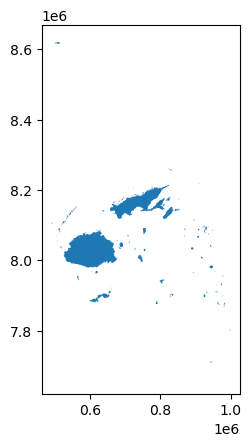

In [12]:
fiji_land.plot()



<font color='red'>Q.2b. Using the same method plot the area of Tropical Cyclone Winston 64 knot wind speed swath (Hint: Use variable Winston_64kn)
</font>

### Land area within the 64 knot wind speed swath


<font color='blue'>Often the areas most affected by tropical cyclones are exposed to the highest wind speed forcing. Here you will plot the areas of Fiji falling within the 64 knot wind speed swath of TC Winston:  
</font>

In [12]:
land_Winston_64kn = gpd.clip(fiji_land, Winston_64kn)

#### The area of the land within the 64 knot wind speed swath of TC Winston is defined within the variable  `land_Winston_64kn` 



<font color='red'>Q.3a. What is the area of the land within the 64 knot wind speed swath of TC Winston in km2? in m2? You will need to use an area function to figure this out e.g. `fiji_land.geometry.area`
</font>



<font color='red'>Q.3b. What is the area of the land within the 64 knot wind speed swath of TC Winston in km2? (Hint: divide by 1,000,000)
</font>



<font color='red'>Q.3c. Plot the area of land affected within the 64 knot wind speed swath of the path of TC Winston 
</font>


### Bonus activity - complete the same workflow steps (questions 1-3) with the TC Yasa 64 knot wind speed swath  

### Exposure of assets to tropical cyclones

<font color='blue'>Tropical cyclones have significant impacts upon economic assets such as buildings and infrastructure. In this activity we will explore some examples of how python can be used to quickly search and filter through large datasets including this collection of building data points.   
</font>

In [14]:
fiji_buildings = gpd.read_file("fiji_buildings_112024.geojson").to_crs("EPSG:32760")

<font color='red'>Q.4a. How many buildings are in the dataset stored in the variable fiji_buildings? You can find out by using the len() function e.g. `len(variable)`
</font>

In [25]:
total_fiji_buildings = 

<font color='red'>Q.4b. With more than 500 buildings it would take a long time to sort through them all manually to find the buildings most affected by TC events. Use Python to find out how many of these buildings were within the 64 knot wind speed swath of TC Winston. Run the code cell below to count how many of these buildings there are.
</font>

In [29]:
joined_buildings = gpd.sjoin(fiji_buildings, land_Winston_64kn, how="inner", predicate="within")
counts = joined_buildings.groupby("index_right").size()
print(counts)

<font color='red'>Q.4c. Enter the number of buildings in the next cell
</font>

In [21]:
buildings_in_TC_Winston_path = 

<font color='red'>Q.4d. Run the following code cell to calculate the percent of buildings falling within the 64 knot wind speed swath of TC Winston. 
</font>

In [40]:
buildings_in_TC_Winston_path/total_fiji_buildings*100

<font color='red'>Q.4e. Complete the same workflow but now for TC Yasa. 
</font>

### Exposure and vulnerability of buildings to tropical cyclones

<font color='blue'>Often rooftops with steep pitches are more vulnerable to direct wind forcing pressure of tropical cyclones. However, buildings with flat rooves may also be vulnerable to the uplift generated through the suction of passing winds too. In this activity we can use Python to query this dataset to count the number of buildings with these different attribute values of vulnerable roof pitches and other conditions...  
</font>

<font color='red'>Q.5a. Count the number of buildings with steep rooves in the dataset by running the cell below: 

In [38]:
# Filter points where the attribute column equals 'desired_value'
steep_rooves = fiji_buildings[fiji_buildings["roof-pitch"] == "Steep"]
len(steep_rooves)

8

<font color='red'>Q.5b. Count the number of buildings with flat rooves in the dataset.

<font color='red'>Q.5c. Count the number of buildings with flat rooves and fall within the TC Winston swath.

<font color='red'>Q.5d. Count the number of buildings with flat rooves and fall within the TC Yasa swath.